**Autor: Prof,Alcimar Medeiros**

**SIMULADOR DAS ELEIÇÕES 2024 PARA VEREADOR DE TENÓRIO - PB**

Total de Votos Válidos: 2883
Quociente Eleitoral: 320.33
UNIÃO conquistou 2.0 cadeiras.
PL conquistou 2.0 cadeiras.
MDB conquistou 1.0 cadeiras.
REPUBLICANOS conquistou 2.0 cadeiras.
Sobras a serem distribuídas: 2
REPUBLICANOS recebe uma cadeira extra pelas sobras. Total agora: 3 cadeiras.
UNIÃO recebe uma cadeira extra pelas sobras. Total agora: 3 cadeiras.

Candidatos Eleitos (do mais votado para o menos votado):
1 - Adilson Conserva (UNIÃO) - 242 votos
2 - Manoel Balduino (REPUBLICANOS) - 189 votos
3 - Ezequiel Cavalcanti (REPUBLICANOS) - 181 votos
4 - Evaneide Vasconcelos (REPUBLICANOS) - 178 votos
5 - Genilson Silva (PL) - 172 votos
6 - Edna Souto (PL) - 160 votos
7 - Jusa (UNIÃO) - 157 votos
8 - Cassio Araujo (UNIÃO) - 151 votos
9 - Thiago da Lagoa (MDB) - 112 votos
Resultados exportados para 'resultados_eleicao.xlsx'.


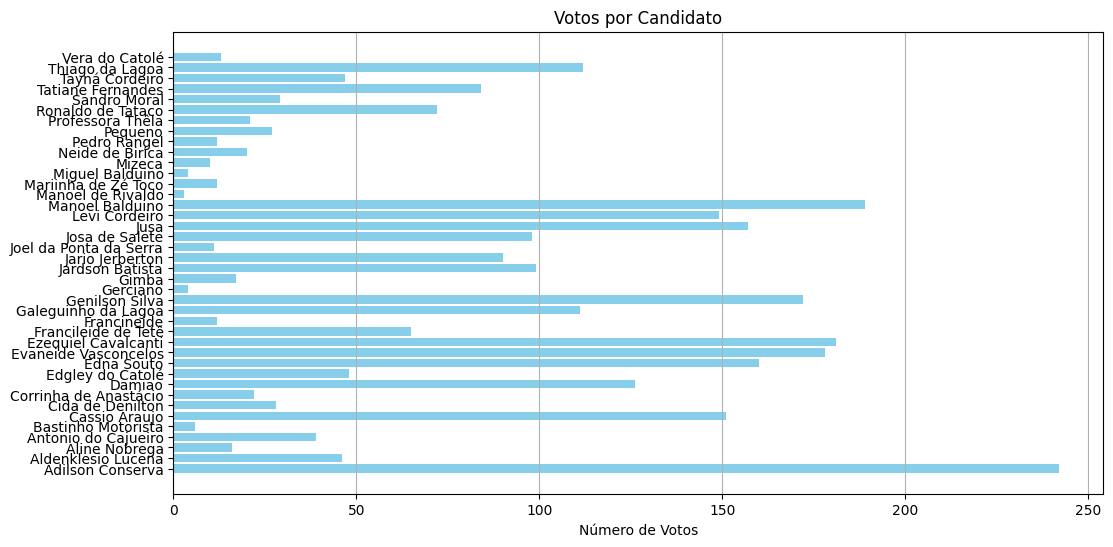

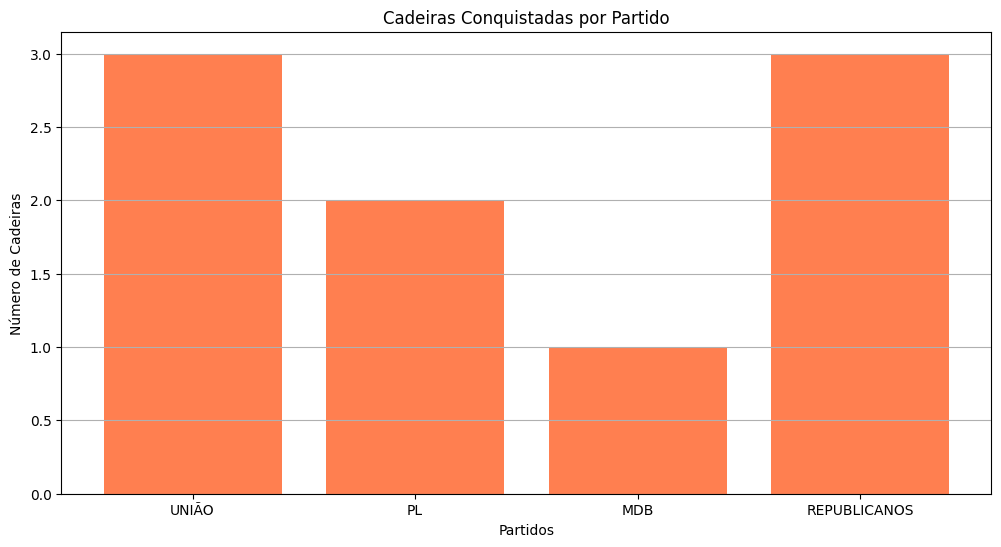

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de entrada
numero_cadeiras = 9  # Número de cadeiras na Câmara Municipal de Tenório

# Candidatos e seus partidos com os votos especificados
candidatos = {
    "Adilson Conserva": ("UNIÃO", 242),
    "Aldenklesio Lucena": ("PL", 46),
    "Aline Nobrega": ("PL", 16),
    "Antonio do Cajueiro": ("MDB", 39),
    "Bastinho Motorista": ("MDB", 6),
    "Cassio Araujo": ("UNIÃO", 151),
    "Cida de Denilton": ("REPUBLICANOS", 28),
    "Corrinha de Anastácio": ("REPUBLICANOS", 22),
    "Damiao": ("PL", 126),
    "Edgley do Catolé": ("UNIÃO", 48),
    "Edna Souto": ("PL", 160),
    "Evaneide Vasconcelos": ("REPUBLICANOS", 178),
    "Ezequiel Cavalcanti": ("REPUBLICANOS", 181),
    "Francileide de Tetê": ("MDB", 65),
    "Francineide": ("MDB", 12),
    "Galeguinho da Lagoa": ("REPUBLICANOS", 111),
    "Genilson Silva": ("PL", 172),
    "Gerciano": ("UNIÃO", 4),
    "Gimba": ("REPUBLICANOS", 17),
    "Jardson Batista": ("REPUBLICANOS", 99),
    "Jario Jerberton": ("PL", 90),
    "Joel da Ponta da Serra": ("UNIÃO", 11),
    "Josa de Salete": ("MDB", 98),
    "Jusa": ("UNIÃO", 157),
    "Levi Cordeiro": ("UNIÃO", 149),
    "Manoel Balduino": ("REPUBLICANOS", 189),
    "Manoel de Rivaldo": ("PL", 3),
    "Mariinha de Zé Toco": ("MDB", 12),
    "Miguel Balduino": ("MDB", 4),
    "Mizeca": ("MDB", 10),
    "Neide de Birica": ("PL", 20),
    "Pedro Rangel": ("PL", 12),
    "Pequeno": ("MDB", 27),
    "Professora Thêla": ("UNIÃO", 21),
    "Ronaldo de Tataco": ("REPUBLICANOS", 72),
    "Sandro Moral": ("REPUBLICANOS", 29),
    "Tatiane Fernandes": ("UNIÃO", 84),
    "Tayná Cordeiro": ("UNIÃO", 47),
    "Thiago da Lagoa": ("MDB", 112),
    "Vera do Catolé": ("PL", 13),
}

# Calcular o total de votos válidos
votos_validos = sum(voto for _, (_, voto) in candidatos.items())
print(f"Total de Votos Válidos: {votos_validos}")  # Exibir total de votos válidos

# Funções para cálculos
def calcular_quociente_eleitoral(votos_validos, numero_cadeiras):
    return votos_validos / numero_cadeiras

def calcular_quociente_partidario(votos_partido, quociente_eleitoral):
    return votos_partido // quociente_eleitoral  # Parte inteira do quociente

def calcular_media(votos_partido, cadeiras_conquistadas):
    return votos_partido / (cadeiras_conquistadas + 1)

# Calcular votos por partido
votos_partidos = {}
for candidato, (partido, votos) in candidatos.items():
    if partido in votos_partidos:
        votos_partidos[partido] += votos
    else:
        votos_partidos[partido] = votos

# Calcular o quociente eleitoral
quociente_eleitoral = calcular_quociente_eleitoral(votos_validos, numero_cadeiras)
print(f"Quociente Eleitoral: {quociente_eleitoral:.2f}")

# Calcular o quociente partidário para cada partido
cadeiras_partidos = {}
for partido, votos in votos_partidos.items():
    cadeiras_conquistadas = calcular_quociente_partidario(votos, quociente_eleitoral)
    cadeiras_partidos[partido] = int(cadeiras_conquistadas)
    print(f"{partido} conquistou {cadeiras_conquistadas} cadeiras.")

# Distribuição das sobras
sobras = int(numero_cadeiras - sum(cadeiras_partidos.values()))
print(f"Sobras a serem distribuídas: {sobras}")

# Distribuir as sobras
for _ in range(sobras):
    melhor_media = 0
    partido_melhor_media = None

    # Calcular a média de cada partido
    for partido, votos in votos_partidos.items():
        media_partido = calcular_media(votos, cadeiras_partidos[partido])
        if media_partido > melhor_media:
            melhor_media = media_partido
            partido_melhor_media = partido

    # Atribuir a cadeira para o partido com a maior média
    cadeiras_partidos[partido_melhor_media] += 1
    print(f"{partido_melhor_media} recebe uma cadeira extra pelas sobras. Total agora: {cadeiras_partidos[partido_melhor_media]} cadeiras.")

# Distribuir as cadeiras para os candidatos
eleitos = []
for partido, cadeiras in cadeiras_partidos.items():
    candidatos_do_partido = [(cand, votos) for cand, (p, votos) in candidatos.items() if p == partido]
    candidatos_do_partido.sort(key=lambda x: x[1], reverse=True)  # Ordena por votos
    eleitos += candidatos_do_partido[:cadeiras]  # Seleciona os mais votados de acordo com as cadeiras

# Ordenar os eleitos do mais votado para o menos votado
eleitos.sort(key=lambda x: x[1], reverse=True)

# Exibir os candidatos eleitos do mais votado para o menos votado
print("\nCandidatos Eleitos (do mais votado para o menos votado):")
for i, (candidato, votos) in enumerate(eleitos, start=1):  # Adiciona a numeração começando de 1
    print(f"{i} - {candidato} ({candidatos[candidato][0]}) - {votos} votos")

# Criar DataFrame para candidatos e votos
df_candidatos = pd.DataFrame(candidatos).T.reset_index()
df_candidatos.columns = ['Candidato', 'Partido', 'Votos']

# Criar DataFrame para distribuição de cadeiras
df_cadeiras = pd.DataFrame(list(cadeiras_partidos.items()), columns=['Partido', 'Cadeiras Conquistadas'])

# Salvar os DataFrames em um arquivo Excel
with pd.ExcelWriter('resultados_eleicao.xlsx') as writer:
    df_candidatos.to_excel(writer, sheet_name='Candidatos', index=False)
    df_cadeiras.to_excel(writer, sheet_name='Cadeiras', index=False)

print("Resultados exportados para 'resultados_eleicao.xlsx'.")

# Gráfico de Votos por Candidato
candidatos_nomes = list(candidatos.keys())
votos_candidatos = [votos for _, (_, votos) in candidatos.items()]

plt.figure(figsize=(12, 6))
plt.barh(candidatos_nomes, votos_candidatos, color='skyblue')
plt.xlabel('Número de Votos')
plt.title('Votos por Candidato')
plt.grid(axis='x')
plt.show()

# Gráfico de Cadeiras por Partido
partidos_nomes = list(cadeiras_partidos.keys())
cadeiras_partidos_values = list(cadeiras_partidos.values())

plt.figure(figsize=(12, 6))
plt.bar(partidos_nomes, cadeiras_partidos_values, color='coral')
plt.xlabel('Partidos')
plt.ylabel('Número de Cadeiras')
plt.title('Cadeiras Conquistadas por Partido')
plt.grid(axis='y')
plt.show()
